In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2025-01-18 09:16:47.575543: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-18 09:16:47.583500: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-18 09:16:47.604154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737172007.641101  122833 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737172007.651675  122833 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-18 09:16:47.689690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [4]:
# import zipfile

# zipfile_extract = zipfile.ZipFile("../10_food_classes_all_data.zip")

In [7]:
# zipfile_extract.extractall()

In [8]:
import os
class_names = []
for dirpath, dirname, filenames in os.walk("../data/10_food_classes_all_data/train/"):
    print(f"There are {len(dirname)} directores in the path:{dirpath} with files {filenames}")
    if len(filenames) > 0:
        class_names.append(dirpath.split("/")[-1])

There are 10 directores in the path:../data/10_food_classes_all_data/train/ with files []
There are 0 directores in the path:../data/10_food_classes_all_data/train/steak with files ['510757.jpg', '168775.jpg', '3372616.jpg', '326587.jpg', '3382936.jpg', '752203.jpg', '388776.jpg', '134598.jpg', '386335.jpg', '1942333.jpg', '231296.jpg', '1147047.jpg', '1600179.jpg', '2893832.jpg', '368170.jpg', '2644457.jpg', '482022.jpg', '3000131.jpg', '56409.jpg', '1446401.jpg', '250978.jpg', '359330.jpg', '187521.jpg', '1941807.jpg', '1930577.jpg', '523535.jpg', '1984271.jpg', '2193684.jpg', '2425062.jpg', '838344.jpg', '2825100.jpg', '2291292.jpg', '3389138.jpg', '2938012.jpg', '2374582.jpg', '1600794.jpg', '2748917.jpg', '804684.jpg', '149087.jpg', '2599817.jpg', '568972.jpg', '2832960.jpg', '1225762.jpg', '32693.jpg', '3223400.jpg', '3855584.jpg', '2495903.jpg', '2090504.jpg', '1403005.jpg', '2760475.jpg', '2878151.jpg', '2940544.jpg', '3030578.jpg', '2062248.jpg', '2395127.jpg', '3346787.jpg', 

In [14]:
class_names = sorted(class_names)

In [12]:
train_dir = "../data/10_food_classes_all_data/train/"
test_dir = "../data/10_food_classes_all_data/test/"

In [19]:
import random

def view_random_image(target_dir,target_class):
    target_loc = target_dir + target_class
    random_image = random.sample(os.listdir(target_loc),1)
    img_vector = mpimg.imread(target_loc + "/" + random_image[0])
    plt.imshow(img_vector)
    plt.title(target_class)
    plt.axis("off")
    plt.show()
    return img_vector

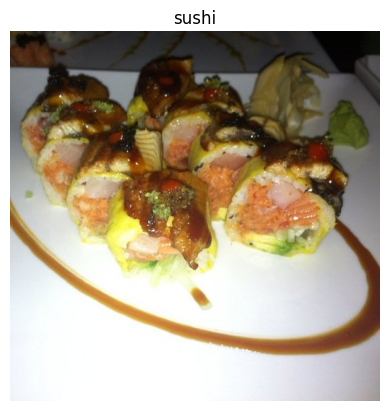

array([[[ 66,  53,  19],
        [ 69,  56,  22],
        [ 72,  59,  24],
        ...,
        [ 14,  16,  11],
        [ 12,  14,   9],
        [ 11,  13,   8]],

       [[ 65,  52,  18],
        [ 67,  54,  20],
        [ 70,  57,  23],
        ...,
        [ 14,  16,  11],
        [ 12,  14,   9],
        [ 12,  14,   9]],

       [[ 64,  51,  19],
        [ 65,  52,  20],
        [ 67,  52,  21],
        ...,
        [ 13,  15,  10],
        [ 13,  15,  10],
        [ 13,  15,  10]],

       ...,

       [[240, 244, 247],
        [240, 244, 247],
        [240, 244, 247],
        ...,
        [159, 154, 150],
        [157, 154, 149],
        [156, 153, 148]],

       [[238, 242, 245],
        [238, 242, 245],
        [239, 243, 246],
        ...,
        [158, 153, 149],
        [155, 152, 147],
        [155, 152, 147]],

       [[237, 241, 244],
        [237, 241, 244],
        [237, 241, 244],
        ...,
        [156, 151, 147],
        [154, 151, 146],
        [153, 150, 145]]

In [25]:
view_random_image(train_dir,class_names[random.randint(0,9)])

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_with_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

'''
    We dont have to augment test data in general to make our model more generalized'
'''
test_data_without_augmentation = ImageDataGenerator(
    rescale = 1./255
)

In [33]:
train_data = train_data_with_augmentation.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode="categorical",
    batch_size = 32,
    shuffle = True
)

test_data = test_data_without_augmentation.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode="categorical",
    batch_size = 32,
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [51]:
from typing import List

def plot_image(img_vector:List[float]):
    plt.imshow(img_vector)
    plt.axis("off")
    plt.show()

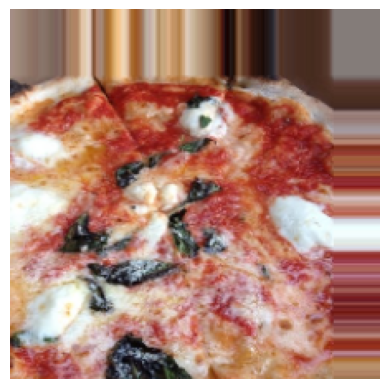

In [52]:
plot_image(train_data[0][0][0])

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model_1 = Sequential([
    Conv2D(
        input_shape=(224, 224, 3),  # Correct input shape
        activation="relu",
        filters=10,
        kernel_size=3,
        padding="valid"
    ),
    Conv2D(
        activation="relu",
        filters=10,
        kernel_size=3
    ),
    MaxPooling2D(
        padding="valid",
        pool_size=2
    ),
    Conv2D(
        activation="relu",
        filters=10,
        kernel_size=3
    ),
    Conv2D(
        activation="relu",
        filters=10,
        kernel_size=3
    ),
    MaxPooling2D(
        padding="valid",
        pool_size=2
    ),
    Flatten(),
    Dense(len(class_names), activation="softmax") 
])


/home/aklamaash/Desktop/Tensorflow/myenv/lib64/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [68]:
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5


2025-01-18 09:53:00.400149: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 63083520 exceeds 10% of free system memory.
2025-01-18 09:53:00.486609: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61952000 exceeds 10% of free system memory.
2025-01-18 09:53:00.788478: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61952000 exceeds 10% of free system memory.
2025-01-18 09:53:00.863497: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 63083520 exceeds 10% of free system memory.


  1/235 ━━━━━━━━━━━━━━━━━━━━ 14:03 4s/step - accuracy: 0.0938 - loss: 2.5250

2025-01-18 09:53:01.367112: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 63083520 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.1564 - loss: 2.3963

/home/aklamaash/Desktop/Tensorflow/myenv/lib64/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 191s 799ms/step - accuracy: 0.1566 - loss: 2.3955 - val_accuracy: 0.2736 - val_loss: 2.0140
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 181s 770ms/step - accuracy: 0.2476 - loss: 2.0866 - val_accuracy: 0.3100 - val_loss: 1.9546
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 174s 739ms/step - accuracy: 0.2818 - loss: 2.0409 - val_accuracy: 0.3192 - val_loss: 1.8982
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 188s 800ms/step - accuracy: 0.3016 - loss: 1.9923 - val_accuracy: 0.3172 - val_loss: 1.9068
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 183s 779ms/step - accuracy: 0.3019 - loss: 1.9695 - val_accuracy: 0.3628 - val_loss: 1.8404


In [70]:
model_1.save("../models/multiclasscnn_with_augmentation.keras")

In [71]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.3486 - loss: 1.8543


[1.8403509855270386, 0.3628000020980835]

In [72]:
model_1.evaluate(train_data)

235/235 ━━━━━━━━━━━━━━━━━━━━ 73s 308ms/step - accuracy: 0.3273 - loss: 1.9389


[1.944921612739563, 0.32626667618751526]

In [73]:
def preprocess_image(img_path:str,img_shape=224):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    img_norm = img/255.0
    return img_norm

In [91]:
def random_image(dir):
    jpg_files = []
    for dirpath,dirname,filenames in os.walk(dir):
        for file in filenames:
            jpg_files.append(dirpath+"/"+file)
    return random.choice(jpg_files)

In [103]:
def predict():
    img = random_image(test_dir)
    preprocess_image_vector = preprocess_image(img)
    print(f"The actual label is:{img.split("/")[-2]}")
    batched_img = tf.expand_dims(preprocess_image_vector, axis=0)
    ypred = model_1.predict(batched_img)
    plot_image(preprocess_image_vector)
    predicted_class = ypred.argmax(axis=-1)[0]
    print(f"Predicted class index: {predicted_class}")

The actual label is:sushi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


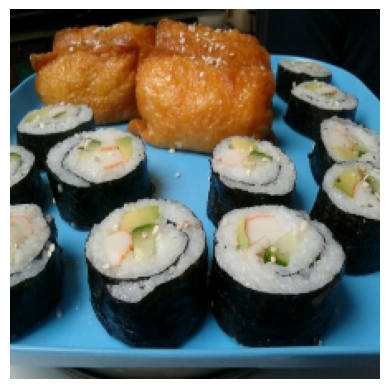

Predicted class index: 5


In [113]:
predict()